# Import Libraries

In [101]:
import random
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import copy
import logging
import missingno
from collections import Counter
from category_encoders import TargetEncoder, BinaryEncoder
from imblearn.over_sampling import (
    SMOTE,
    RandomOverSampler,
    SVMSMOTE,
    BorderlineSMOTE,
    ADASYN,
    SMOTEN,
    SMOTENC
)
from imblearn.under_sampling import (
    TomekLinks, 
    RandomUnderSampler,
    EditedNearestNeighbours, 
    RepeatedEditedNearestNeighbours, 
    AllKNN, 
    CondensedNearestNeighbour, 
    ClusterCentroids, 
    NearMiss
)
from sklearn.model_selection import (
    LeaveOneOut,
    LeavePOut,
    RepeatedKFold,
    StratifiedKFold,
    TimeSeriesSplit,
    train_test_split,
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    learning_curve,
    KFold
)
from sklearn.preprocessing import (
    LabelEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler,
    RobustScaler,
    LabelBinarizer, 
    MultiLabelBinarizer,
    MaxAbsScaler,
    QuantileTransformer,
    PowerTransformer,
    Normalizer
)
from sklearn.feature_extraction import (
    DictVectorizer, 
    FeatureHasher
)
from sklearn.linear_model import (
    Ridge,
    Lasso,
    ElasticNet,
    BayesianRidge
)
from sklearn.feature_selection import (
    SelectKBest, 
    SelectFpr, 
    SelectFdr, 
    SelectFwe, 
    SelectPercentile, 
    GenericUnivariateSelect, 
    VarianceThreshold, 
    RFE, 
    RFECV, 
    SequentialFeatureSelector, 
    SelectFromModel, 
    f_regression, 
    chi2, 
    f_classif, 
    mutual_info_classif, 
    mutual_info_regression
)
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    BaggingRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor
)
from xgboost import XGBRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)
from tpot import TPOTRegressor
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.decomposition import (
    PCA, 
    FactorAnalysis, 
    TruncatedSVD, 
    FastICA, 
    KernelPCA
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from tensorflow.keras.layers import Input, Dense  # type: ignore
from tensorflow.keras.models import Model  # type: ignore
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

from scipy.stats import uniform, randint
from fast_ml.model_development import train_valid_test_split
from typing import (
    Any,
    Literal,
    Union,
    List,
    Optional,
    Dict,
    Tuple
)


logging.basicConfig(level=logging.INFO)

# Call_def

In [102]:
from ML_def import (
    read_data,
    columns_info,
    not_useful_columns,
    convert_to_numeric,
    target_last_col,
    remove_missing_rows,
    fill_missing_values_dataFrame,
    fill_missing_values_column,
    check_outliers,
    box_plot_all_columns,
    get_columns_with_2_unique_values,
    analyze_null_columns,
    check_Balance_Regression,
    rate_by_group,
    over_under_sampling_regression,
    plot_groupby,
    plot_pivot,
    plot_pivot_2,
    plot_groupby_and_pivot,
    calculate_correlation,
    Heatmap_Correlation,
    create_custom_scatter_plot,
    plot_histograms,
    encode_column,
    get_x_y_TVT,
    validate_test_data_categorical_columns,
    get_x_y_TVT_shape,
    feature_selection,
    dimensionality_reduction,
    scale_data,
    get_cross_validator,
    grid_search_regressor,
    random_search_regressor,
    get_regressor,
    get_x_y,
    plot_feature_importance,
    Check_Overfitting_Regression,
    evaluate_model_regression,
    plots_evaluate_models,
)

# call_visualization_def

In [103]:
from ML_visualization import (
    plot_line,
    plot_line_matplotlib,
    plot_line_all_column,
    plot_line_seaborn,
    plot_line_plotly,
    scatter_plot_matplotlib,
    scatter_plot_seaborn,
    scatter_plot_plotly,
    reg_plot,
    resid_plot,
    bar_plot_matplotlib,
    bar_plot_seaborn,
    bar_plot_all_column,
    bar_plot_plotly,
    multiple_bar_plot_matplotlib,
    multiple_bar_plots_seaborn,
    multiple_bar_plots_plotly,
    cat_plot,
    cat_plot_all_column,
    facet_grid_seaborn,
    pie_chart,
    pie_chart_plotly,
    plot_single_histogram_matplotlib,
    plot_histograms_matplotlib,
    plot_single_histogram_seaborn,
    plot_histograms_seaborn,
    plot_histograms_plotly,
    kde_plot,
    kde_plot_all_column,
    count_plot,
    count_plot_all_column,
    count_plot_plotly,
    box_plot_matplotlib,
    box_plot_seaborn,
    box_plot_plotly,
    box_plot_all_column,
    heatmap_plot,
    heatmap_plot_plotly,
    pair_plot,
    pair_plot_plotly,
    violin_plot,
    violin_plot_plotly,
    plot_violin_all_column,
    joint_plot,
    plot_parallel_coordinates,
    plot_contour,
    plot_tricontourf,
    custom_plot
)

# Read_Data

In [104]:
df = read_data(r'Housing.csv')
true_original_df = copy.deepcopy(df)
print(df.shape)
df.head()

the DataFrame dont have any duplicates row
Data read successfully from Housing.csv
(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [105]:
target_column = 'price'

In [106]:
# Make the target is last column
df = target_last_col(df,target_column)

# Get Information of Data

In [107]:
df_columns = df.columns.to_list()
print(df_columns)

['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus', 'price']


In [108]:
columns_info(df)

,names,dtypes,unique,n_unique,number_of_rows,number_of_null
0,area,int64,"[7420, 8960, 9960, 7500, 8580, 16200, 8100, 57...",284,545,0
1,bedrooms,int64,"[4, 3, 5, 2, 6, 1]",6,545,0
2,bathrooms,int64,"[2, 4, 1, 3]",4,545,0
3,stories,int64,"[3, 4, 2, 1]",4,545,0
4,mainroad,object,"[yes, no]",2,545,0
5,guestroom,object,"[no, yes]",2,545,0
6,basement,object,"[no, yes]",2,545,0
7,hotwaterheating,object,"[no, yes]",2,545,0
8,airconditioning,object,"[yes, no]",2,545,0
9,parking,int64,"[2, 3, 0, 1]",4,545,0


# drop not useful columns

#### list of columns

In [109]:
# not_useful_columns_name = ['CustomerID', 'Count', 'Country', 'State', 'Churn Label', 'Churn Reason']
# not_useful_columns(df=df, column_name=not_useful_columns_name)

#### single column

In [110]:
# not_useful_columns(df=df, column_name="Lat Long")

# change the dtype of the column from object to numeric

#### list of columns

In [111]:
# convert_to_numeric_columns_name = ['Total Charges']
# convert_to_numeric(df=df, column_name=convert_to_numeric_columns_name)

#### single column

In [112]:
# convert_to_numeric(df=df, column_name='Total Charges')

# take copy for Visualization

In [113]:
original_df = copy.deepcopy(df)
original_df.head(3)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished,13300000
1,8960,4,4,4,yes,no,no,no,yes,3,no,furnished,12250000
2,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished,12250000


# Describe numerical column and his information

In [114]:
Describe_numerical_column = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(Describe_numerical_column)

['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'price']


In [115]:
df.describe()

,area,bedrooms,bathrooms,stories,parking,price
count,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


# Describe object column and his information

In [116]:
Describe_object_column =df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(Describe_object_column)

['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [117]:
df.describe(include=['object'])

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
count,545,545,545,545,545,545,545
unique,2,2,2,2,2,2,3
top,yes,no,no,no,no,no,semi-furnished
freq,468,448,354,520,373,417,227


# Data Encoding columns with 2 unique values

In [118]:
get_columns_with_2_unique_values(df)

The list: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'] unique values: ('no', 'yes')


In [119]:
columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df = encode_column(df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

In [120]:
# columns = ['Gender']
# df = encode_column(df, columns = columns, method='binary', binary_1='Known', binary_0='Unknown')

In [121]:
# if the target column not binary
# columns = [target_column]
# true_original_df = encode_column(true_original_df, columns = columns, method='binary', binary_1='Yes', binary_0='No')

In [122]:
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
0,7420,4,2,3,1,1,1,1,1,2,1,furnished,13300000
1,8960,4,4,4,1,1,1,1,1,3,0,furnished,12250000
2,9960,3,2,2,1,1,0,1,0,2,1,semi-furnished,12250000
3,7500,4,2,2,1,1,0,1,1,3,1,furnished,12215000
4,7420,4,1,2,1,0,0,1,1,2,0,furnished,11410000


# check columns have nulls

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   stories           545 non-null    int64 
 4   mainroad          545 non-null    int64 
 5   guestroom         545 non-null    int64 
 6   basement          545 non-null    int64 
 7   hotwaterheating   545 non-null    int64 
 8   airconditioning   545 non-null    int64 
 9   parking           545 non-null    int64 
 10  prefarea          545 non-null    int64 
 11  furnishingstatus  545 non-null    object
 12  price             545 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [124]:
null_columns = analyze_null_columns(df)
null_columns

The columns dtype is object: []
The columns dtype is numerical: []


,Column,Null Count,Type


## Identify columns with missing values

In [125]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# Removing Rows with Missing Values

#### list of columns

In [126]:
# remove_rows_column_name = ['Total Charges', '', '']
# remove_missing_rows(df=df, column_name=remove_rows_column_name)

#### single column

In [127]:
# remove_missing_rows(df=df, column_name='Total Charges')

#### from all DataFrame

In [128]:
# remove_missing_rows(df=df)

## check columns with missing values

In [129]:
# # Identify columns with missing values
# missing_columns = df.columns[df.isnull().any()].tolist()
# print("Columns with missing values: \n" , missing_columns)

# Filling Missing Values

### Filling Missing Values for all DataFrame

In [130]:
# df = fill_missing_values_dataFrame(df, model='KNNImputer', n_neighbors=3)

### Filling Missing Values for column

#### list of columns

In [131]:
# fill_missing_columns = ['', '', '']
# df = fill_missing_values_column(df, columns=fill_missing_columns, model='KNNImputer', n_neighbors=3)

#### single column

In [132]:
# df = fill_missing_values_column(df, columns='Total Charges', model='KNNImputer', n_neighbors=3)

### check columns with missing values

In [133]:
# Identify columns with missing values
missing_columns = df.columns[df.isnull().any()].tolist()
print("Columns with missing values: \n" , missing_columns)

Columns with missing values: 
 []


# check outliers

## check outliers (numbers)

In [134]:
outliers_df = check_outliers(df)

area               545
bedrooms           107
bathrooms            1
stories             41
mainroad             0
guestroom            0
basement             0
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
price              545
dtype: int64


## check outliers (plots)

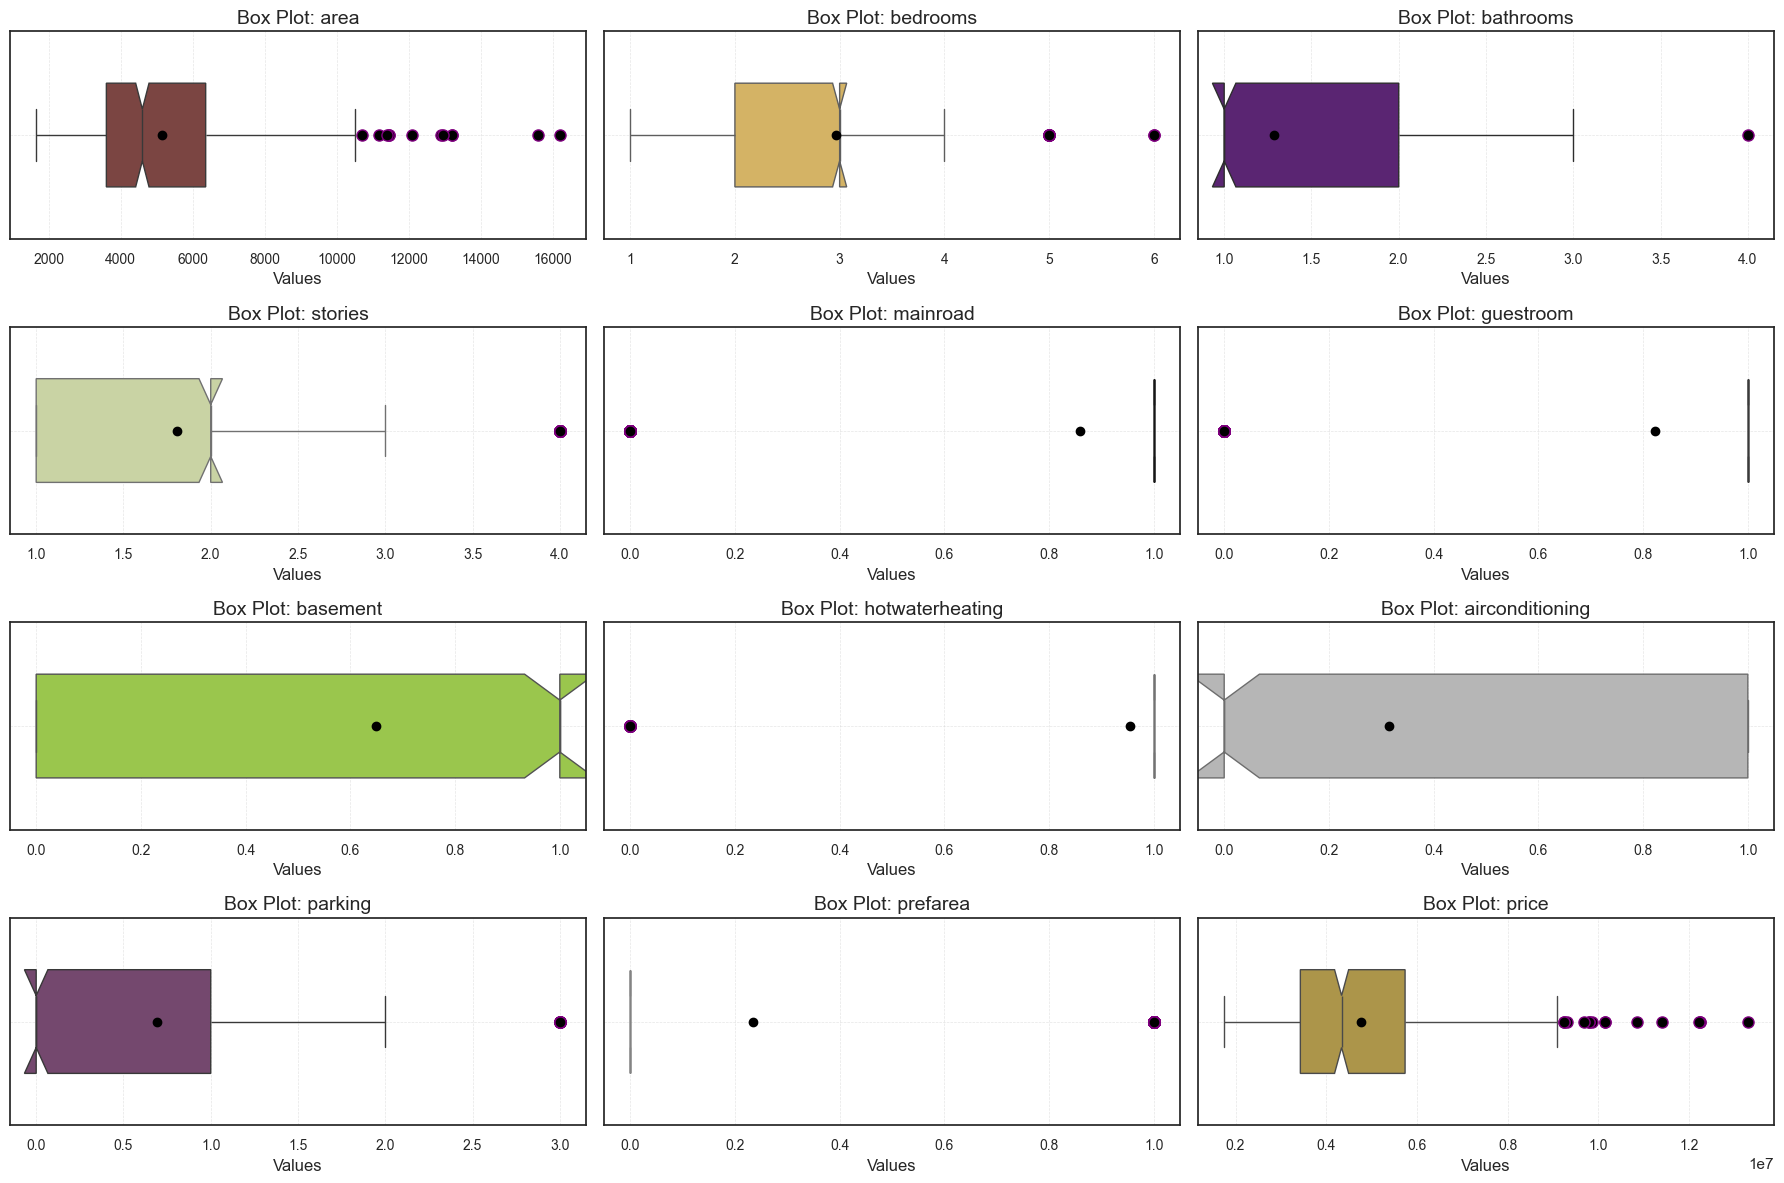

In [135]:
box_plot_all_columns(df, subplot_row = 3, figsize=(18, 12))

# Check the unbalance data

INFO:root:Binning the data for column: price into 8 bins
INFO:root:Creating count plot for binned data of column: price


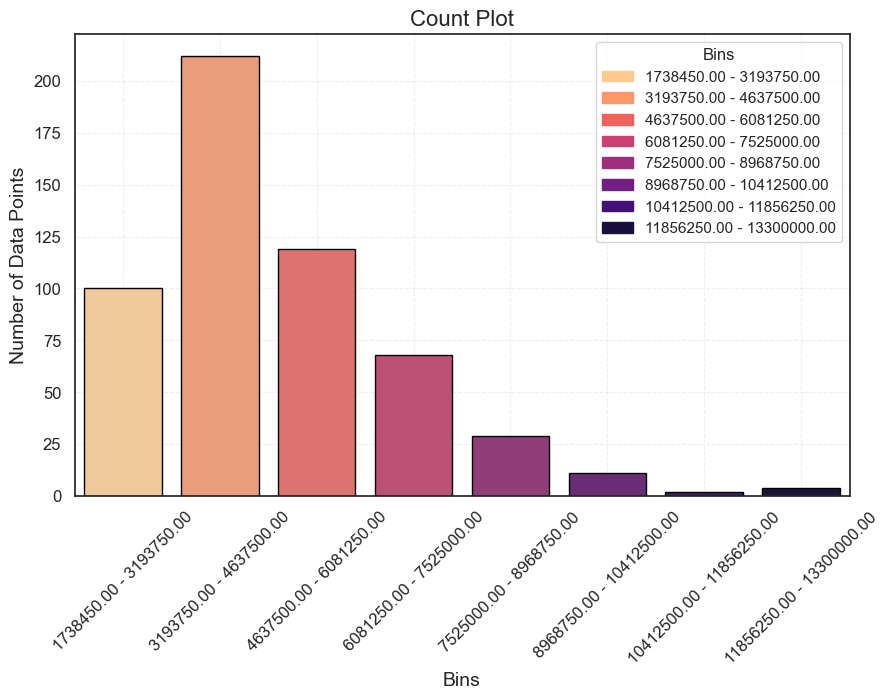

In [136]:
check_Balance_Regression(df, column_plot=target_column, div_number=8)

# Visualization

## info from the data

In [137]:
# age_Exited_rates = rate_by_group(true_original_df, 'MaritalStatus', 'Churn', 'CustomerID', positive_class=1, threshold=4)

In [138]:
# NumOfProducts_Exited_rates = rate_by_group(true_original_df, 'PrizmCode', 'Churn', 'CustomerID', positive_class=1)

In [139]:
# Geography_Exited_rates = rate_by_group(true_original_df, 'CreditRating', 'Churn', 'CustomerID', positive_class=1)

In [140]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionOffersAccepted', 'Churn', 'CustomerID', positive_class=1, threshold=5)

In [141]:
# Tenure_Exited_rates = rate_by_group(true_original_df, 'RetentionCalls', 'Churn', 'CustomerID', positive_class=1, threshold=5)
# Tenure_Exited_rates

## chart

In [142]:
# PaymentMethod_name = df['PrizmCode'].value_counts().index.to_list()
# PaymentMethod_values = df['PrizmCode'].value_counts().values.tolist()
# # pie_chart(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Payment Methods")
# pie_chart_plotly(labels=PaymentMethod_name, sizes=PaymentMethod_values, title="Prizm Code")


In [143]:
# InternetService_name = df['MaritalStatus'].value_counts().index.to_list()
# InternetService_values = df['MaritalStatus'].value_counts().values.tolist()
# # pie_chart(labels=InternetService_name, sizes=InternetService_values, title="Payment Methods")
# pie_chart_plotly(labels=InternetService_name, sizes=InternetService_values, title="Marital Status")

In [144]:
# Contract_name = original_df['CreditRating'].value_counts().index.to_list()
# Contract_values = original_df['CreditRating'].value_counts().values.tolist()
# # pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
# pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Credit Rating")

In [145]:
# Contract_name = original_df['RetentionCalls'].value_counts().index.to_list()
# Contract_values = original_df['RetentionCalls'].value_counts().values.tolist()
# # pie_chart(labels=Contract_name, sizes=Contract_values, title="Payment Methods")
# pie_chart_plotly(labels=Contract_name, sizes=Contract_values, title="Retention Calls")

## Multiple bar

HasCreditCard
RetentionCalls
CreditRating

In [146]:
# grouped_data = original_df.groupby(['HasCreditCard', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='HasCreditCard by Churn Status', xlabel='HasCreditCard Type', ylabel='Count')

In [147]:
# grouped_data = original_df.groupby(['RetentionCalls', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='RetentionCalls by Churn Status', xlabel='RetentionCalls Type', ylabel='Count')

In [148]:
# grouped_data = original_df.groupby(['CreditRating', 'Churn']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['not Churn', 'Churn']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='CreditRating by Churn Status', xlabel='CreditRating Type', ylabel='Count')

In [149]:
# grouped_data = original_df.groupby(['CreditRating', 'HasCreditCard']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ["Hasn't Credit Card","Has Credit Card"]

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='CreditRating by HasCreditCard Status', xlabel='CreditRating', ylabel='Count')

In [150]:
# grouped_data = original_df.groupby(['RetentionCalls', 'PrizmCode']).size().unstack(fill_value=0)

# categories = grouped_data.index.tolist()
# datasets = [grouped_data[col].tolist() for col in grouped_data.columns]
# labels = ['Other', 'Rural','Suburban', 'Town']

# multiple_bar_plot_matplotlib(categories, datasets, labels=labels, title='NumOfProducts by PrizmCode Status', xlabel='NumOfProducts', ylabel='Count')

## Bar

In [151]:
# column_counts = original_df['ThreewayCalls'].value_counts().reset_index()
# column_counts.columns = ['ThreewayCalls', 'value']

# bar_plot_plotly(df=column_counts, x='ThreewayCalls', y='value', hue='value')

In [152]:
# column_counts = original_df['HasCreditCard'].value_counts().reset_index()
# column_counts.columns = ['HasCreditCard', 'value']

# bar_plot_seaborn(df=column_counts, x='HasCreditCard', y='value',palette='viridis')

In [153]:
# column_counts = original_df['RetentionCalls'].value_counts().reset_index()
# column_counts.columns = ['RetentionCalls', 'value']

# bar_plot_matplotlib(column_counts['RetentionCalls'], column_counts['value'],x_rotation=0)

## count plot

In [154]:
# count_plot(df=original_df , x='RetentionOffersAccepted' , hue='Churn')

In [155]:
# categorical_features=original_df.drop(['ServiceArea'],axis=1).select_dtypes(exclude=['int64', 'float64']).columns.tolist()
# count_plot_all_column(categorical_features, original_df, vision='x', num_of_column=4)

## Violin

In [156]:
# violin_plot(data=original_df, x='TruckOwner', y='MonthlyRevenue', hue='TruckOwner',split=True) #catagorical column in x and numircal in y

In [157]:
# violin_plot(data=original_df, x='HasCreditCard', y='PercChangeRevenues', hue='HasCreditCard') #catagorical column in x and numircal in y

In [158]:
# plot_violin_all_column(df, figsize=(30, 30), n_cols=6)

## Histogram

In [159]:
# plot_single_histogram_seaborn(original_df,x='MonthsInService', bins=50, palette='magma', show=False)
# plt.axvline(np.mean(original_df["MonthsInService"]) , color = "black" , label ="The Mean of the tenure")
# plt.axvline(np.median(original_df["MonthsInService"]) , color = "blue" , label ="The Median of the tenure")
# plt.show()

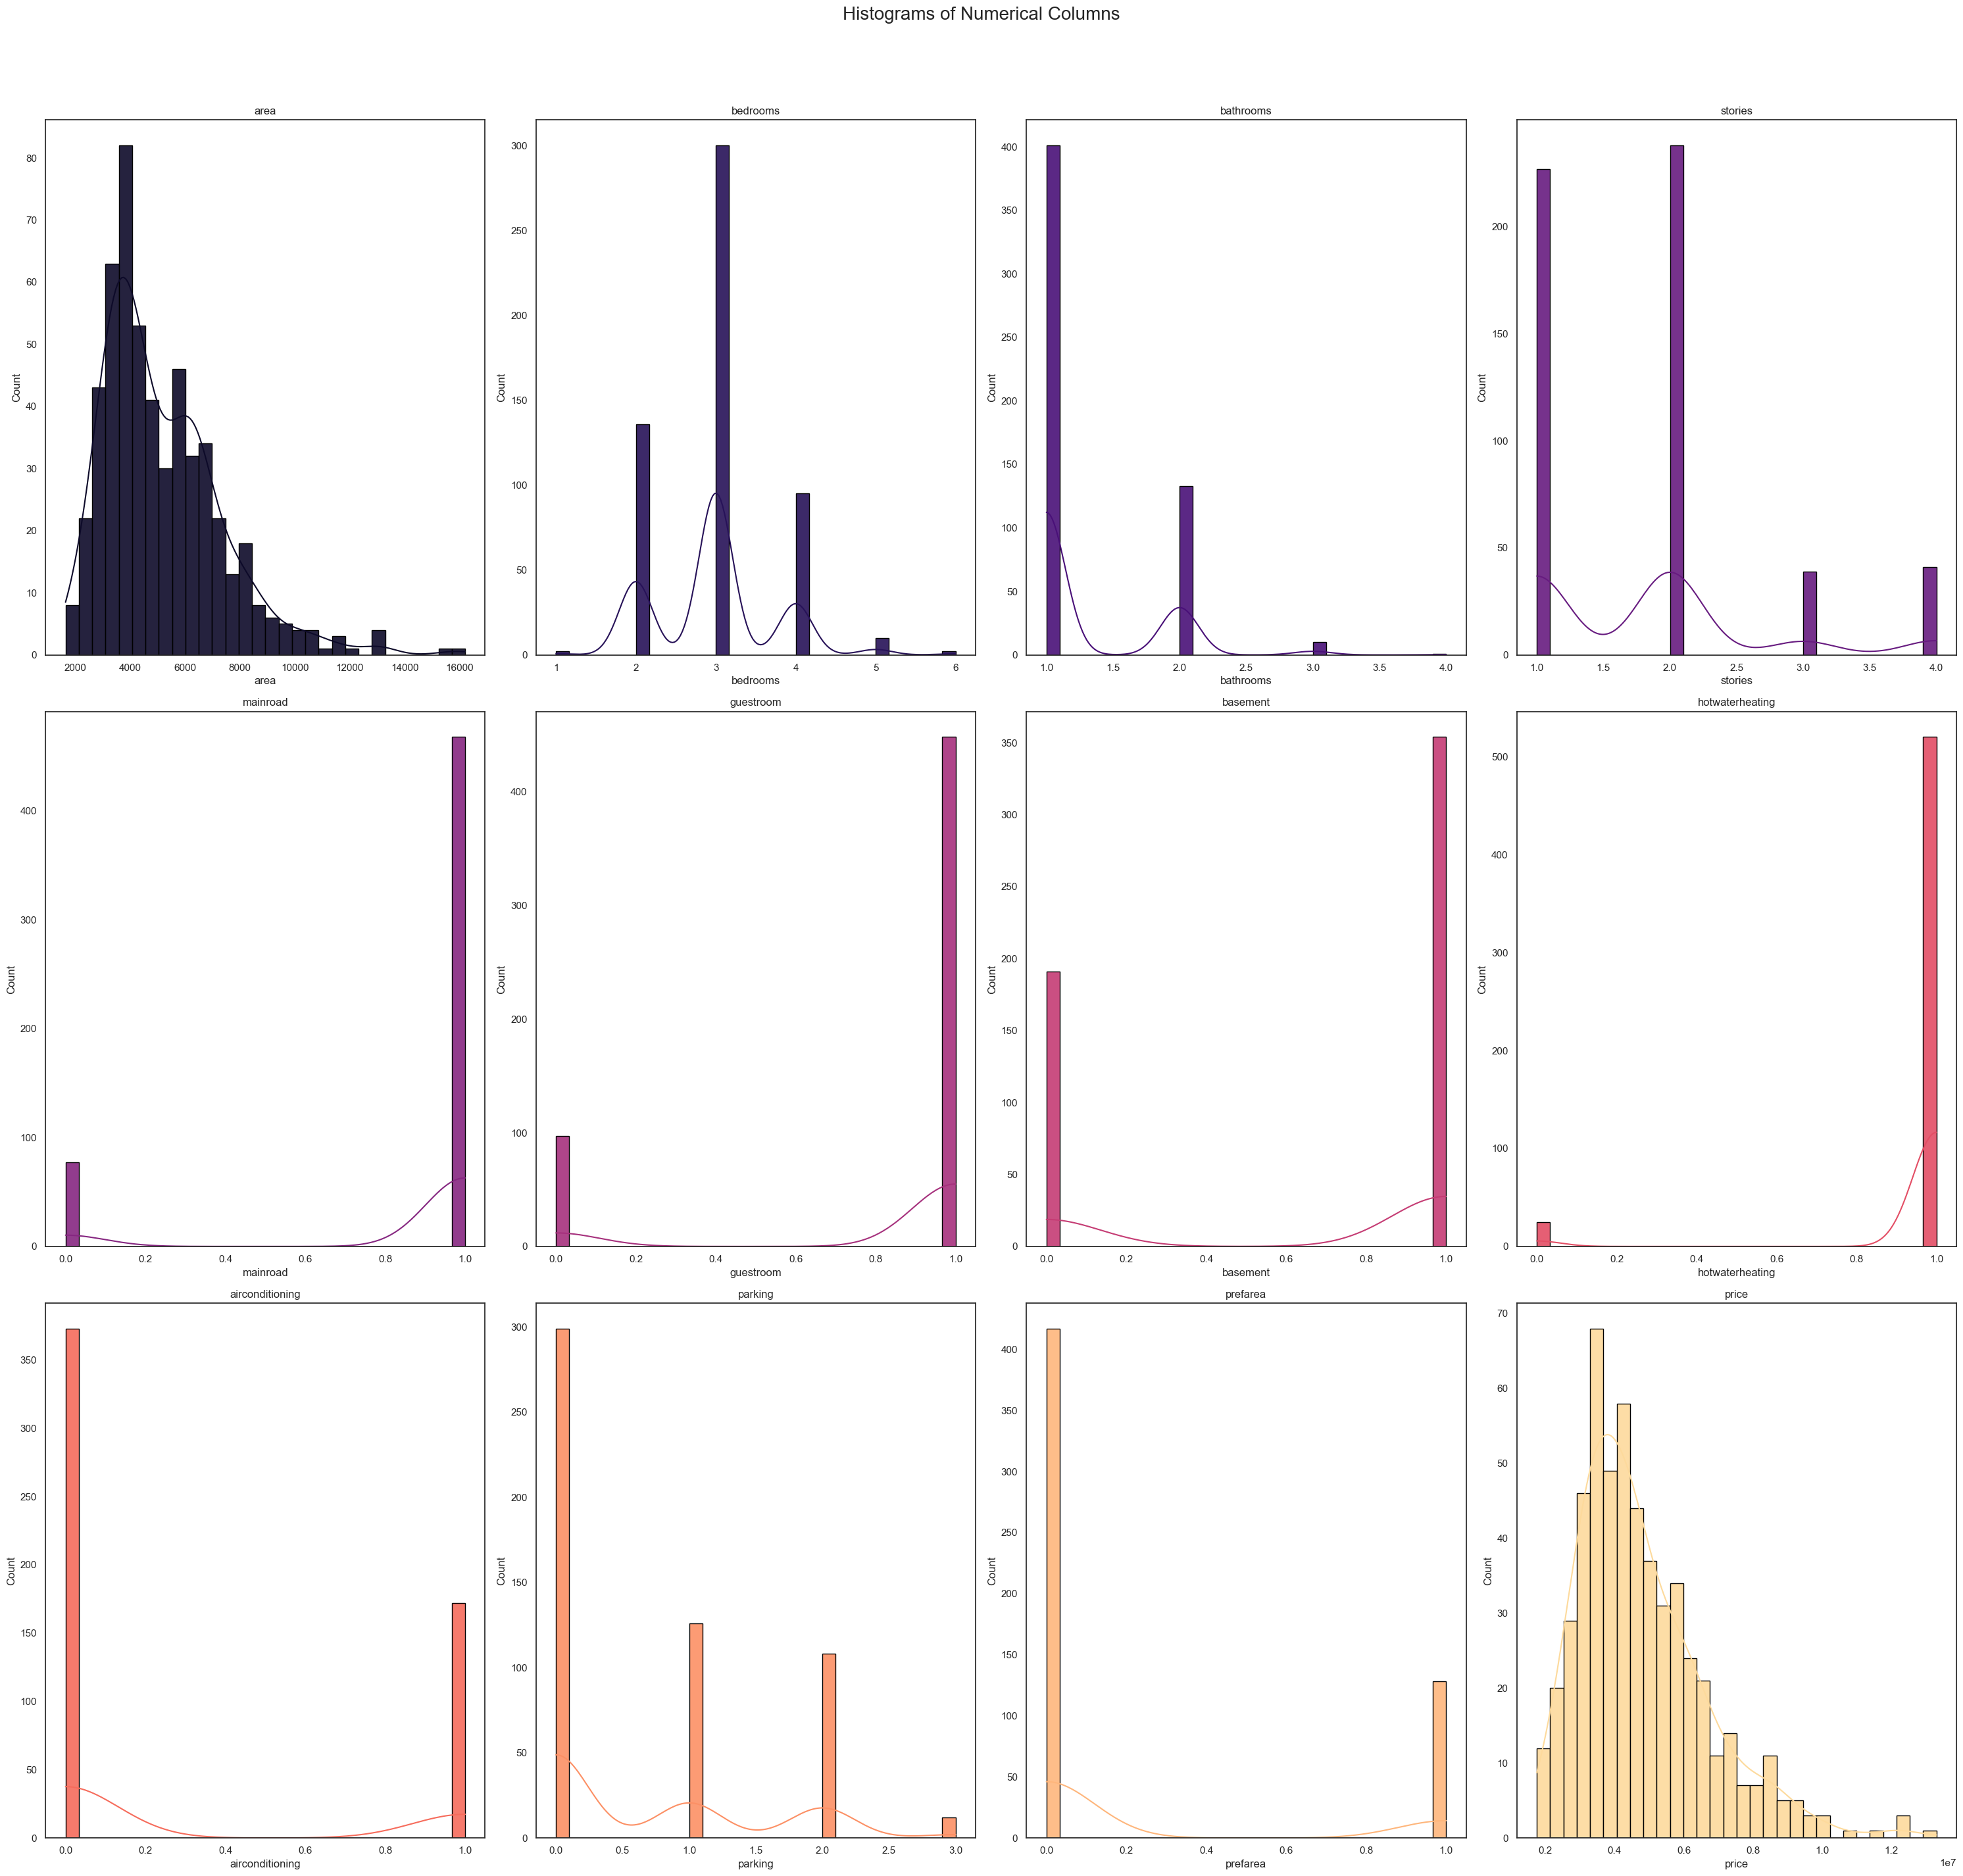

In [160]:
plot_histograms(df,column=None, bins=30, single_histogram_figsize = (20, 20), all_histograms_figsize = (30, 30))

#  Groupby and pivot

### Groupby

In [161]:
# grouped_df = df.groupby('')

### pivot

In [162]:
# pivot_df = df.pivot_table(values='values', index='category', columns='sub_category', aggfunc='mean')

# Correlation Coefficient

## Calculate Correlation

In [163]:
calculate_correlation(df, outcome_column=target_column,num_results=7)

Calculating Pearson correlation coefficients for numeric columns against the outcome column: {outcome_column}
Top 7 results:
           Variable  Pearson Coefficient       P-Value
0              area             0.535997  7.388225e-42
2         bathrooms             0.517545  1.139322e-38
8   airconditioning             0.452954  6.310970e-29
3           stories             0.420712  8.668397e-25
9           parking             0.384394  1.238378e-20
1          bedrooms             0.366494  9.080302e-19
10         prefarea             0.329777  2.718374e-15

area
The Pearson Correlation Coefficient for area is 0.5360 with a P-value of P = 7.388e-42

bathrooms
The Pearson Correlation Coefficient for bathrooms is 0.5175 with a P-value of P = 1.139e-38

airconditioning
The Pearson Correlation Coefficient for airconditioning is 0.4530 with a P-value of P = 6.311e-29

stories
The Pearson Correlation Coefficient for stories is 0.4207 with a P-value of P = 8.668e-25

parking
The Pearson Corr

,Variable,Pearson Coefficient,P-Value
0,area,0.535997,7.388225e-42
2,bathrooms,0.517545,1.139322e-38
8,airconditioning,0.452954,6.310970e-29
3,stories,0.420712,8.668397e-25
9,parking,0.384394,1.238378e-20
1,bedrooms,0.366494,9.080302e-19
10,prefarea,0.329777,2.718374e-15


## Visualize Correlation with Bars

In [164]:
# df_corr = df.corr()[target_column].sort_values(ascending = False)
# df_corr_index = df_corr.index.to_list()
# df_corr_values = df_corr.values.tolist()
# df_corr = pd.DataFrame({'name': df_corr_index, 'values':df_corr_values})
# bar_plot_plotly(df=df_corr, x='name', y='values',hue='values', width=1500, height=650)

## Visualize Correlation with Heatmap

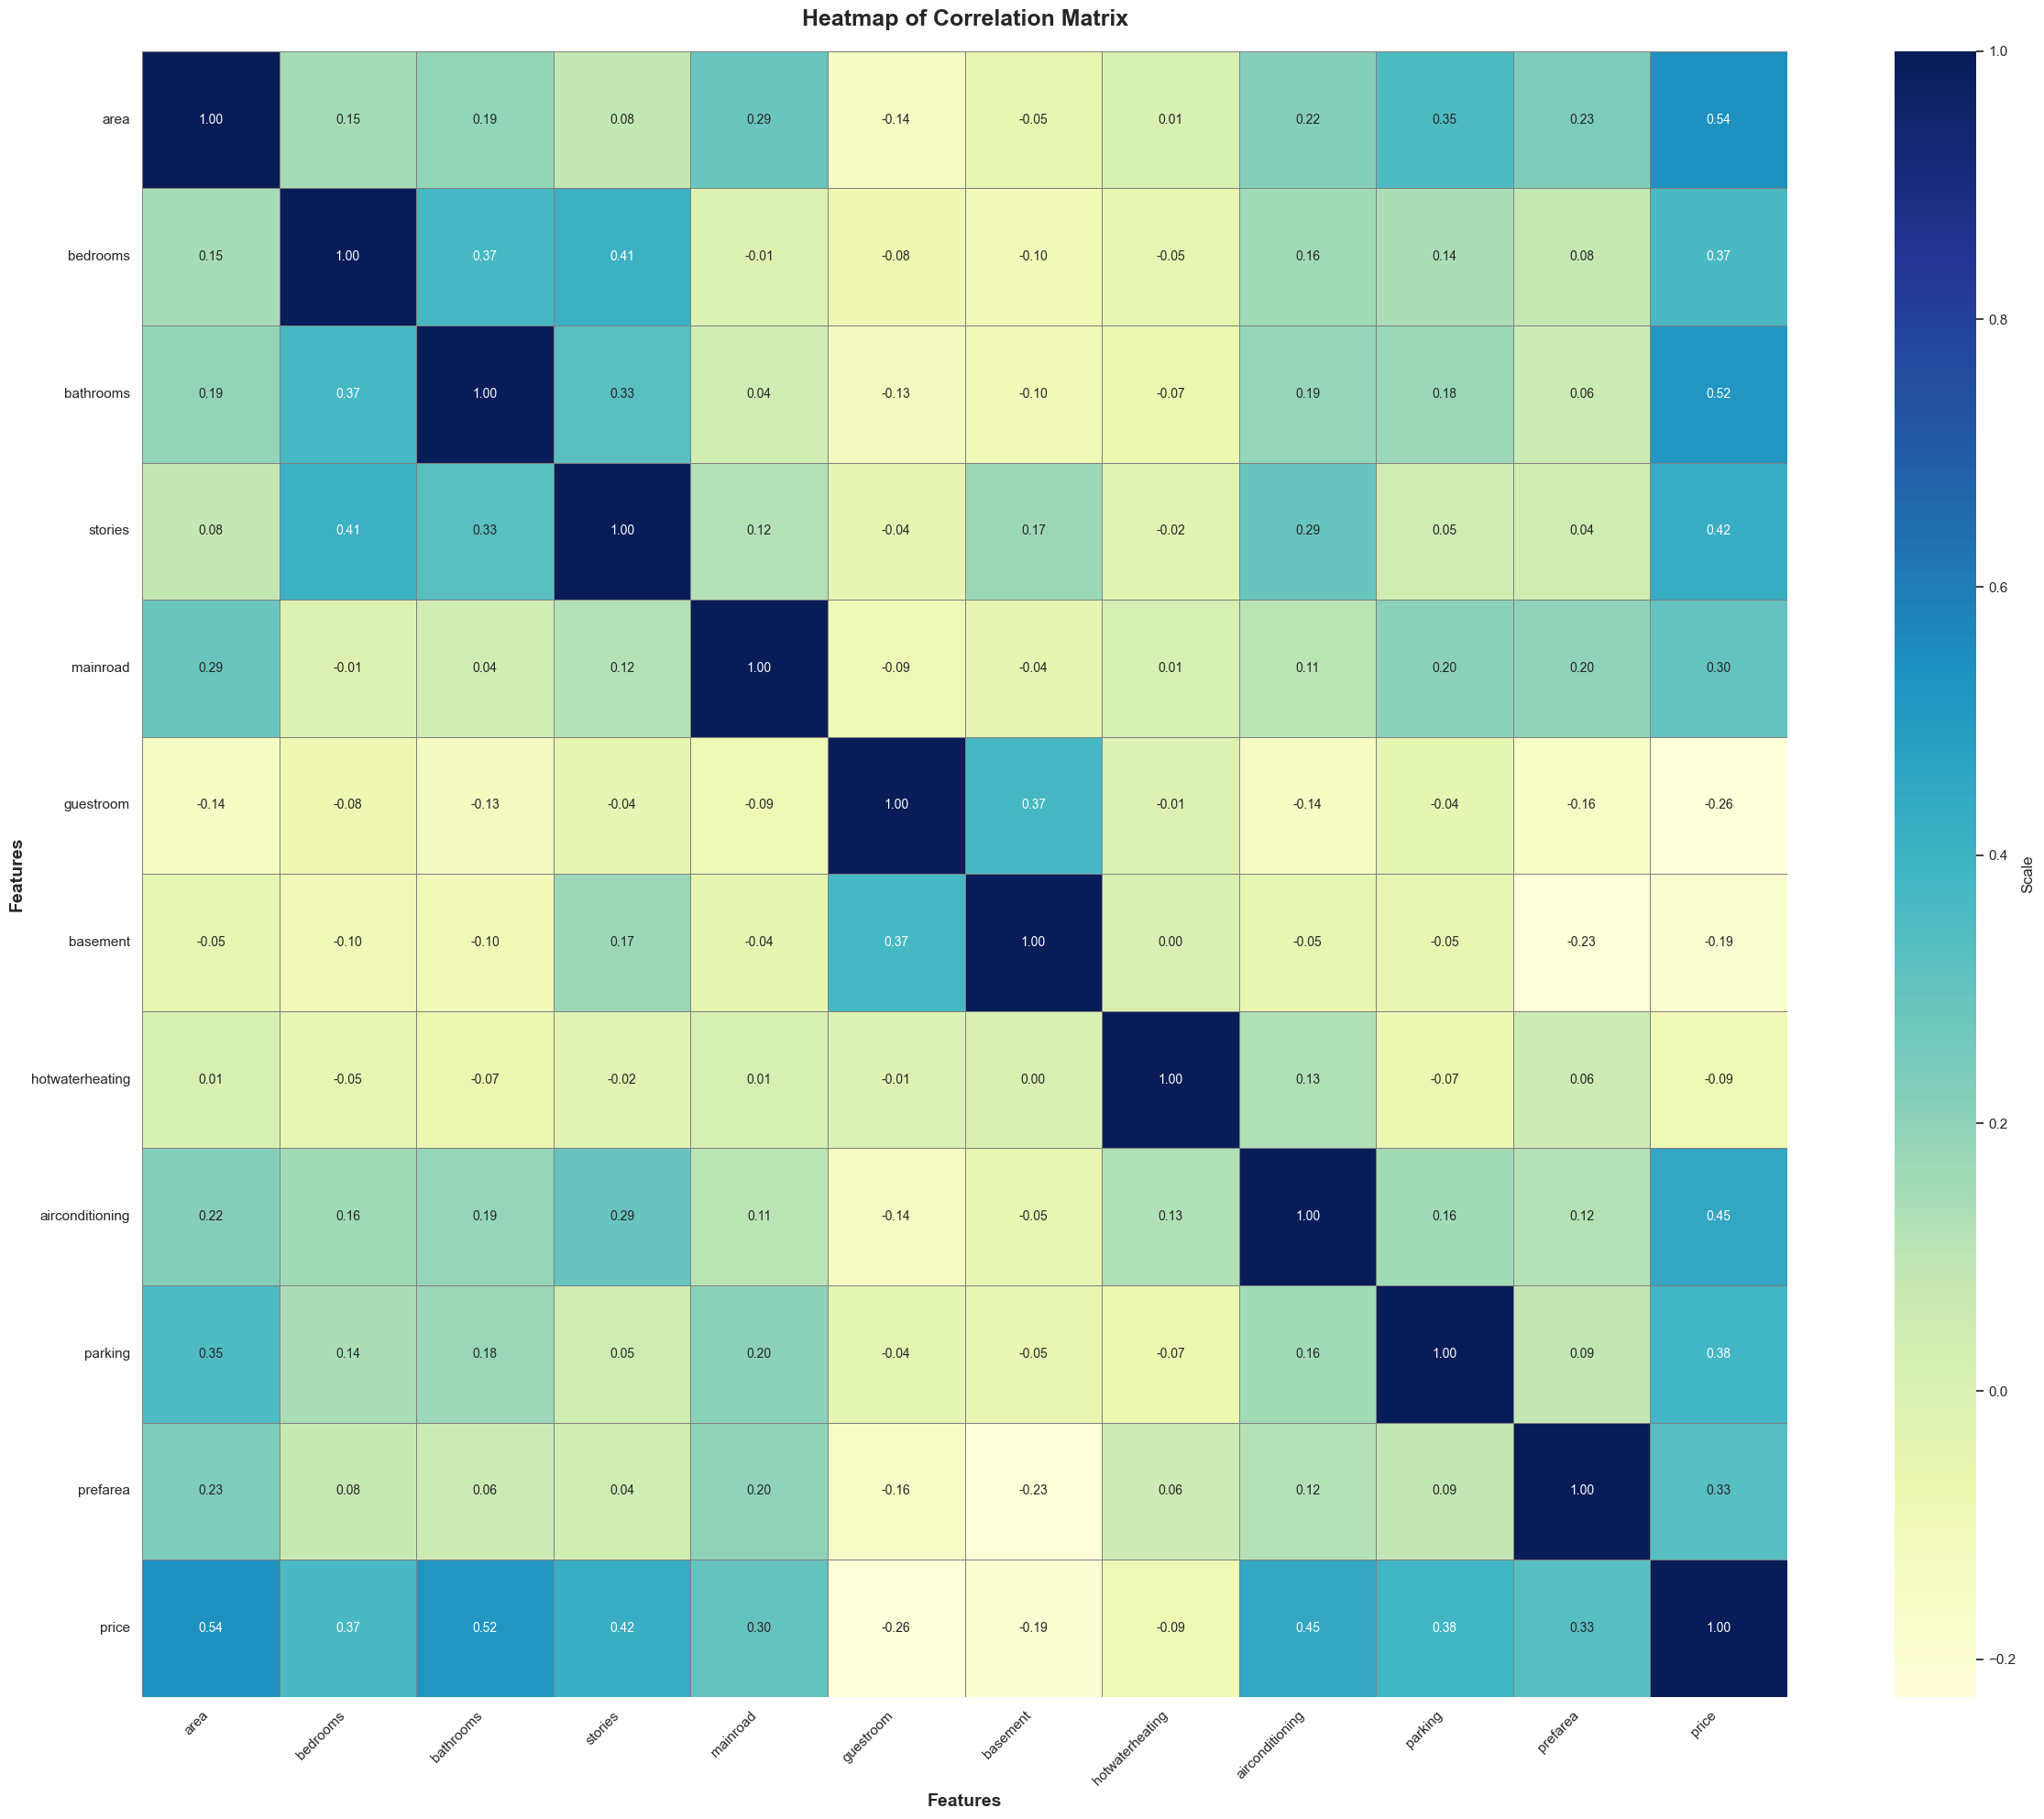

In [165]:
correlations = Heatmap_Correlation(df, mask=-1, cmap="YlGnBu", save_path=None, annot_size = 10, figsize=(25, 20))

# Data Encoding

In [166]:
df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

['furnishingstatus']

In [167]:
# ordinal_categories = df[''].value_counts().index.to_list()
# ordinal_categories

In [168]:
columns = ['furnishingstatus']

df = encode_column(df, columns = columns, method='get_dummies')

# df = encode_column(df, columns = 'City', method= 'label')
# df['City'] = df['City'].astype(float)

# ordinal_categories = df['CreditRating'].value_counts().index.to_list()
# df = encode_column(df, columns = 'CreditRating', method= 'ordinal', ordinal_categories=['1-Highest', '2-High', '3-Good', '4-Medium', '5-Low', '6-VeryLow', '7-Lowest'])

# df = encode_column(df, columns = '', method='target',target="")

# df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()

In [169]:
len(df.columns)

14

## Make the target is last column

In [170]:
df = target_last_col(df, target_column)
df.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,price
0,7420,4,2,3,1,1,1,1,1,2,1,0.0,0.0,13300000
1,8960,4,4,4,1,1,1,1,1,3,0,0.0,0.0,12250000
2,9960,3,2,2,1,1,0,1,0,2,1,1.0,0.0,12250000
3,7500,4,2,2,1,1,0,1,1,3,1,0.0,0.0,12215000
4,7420,4,1,2,1,0,0,1,1,2,0,0.0,0.0,11410000


# Get X , Y (TVT)

In [171]:
x,y = get_x_y(df,target_column)

In [172]:
x_train, y_train, x_valid, y_valid, x_test, y_test = get_x_y_TVT(df, target=target_column)

In [173]:
get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid, x_test, y_test)

x_train shape = (383, 13)
x_valid shape = (53, 13)
x_test shape = (109, 13)
y_train shape = (383,)
y_valid shape = (53,)
y_test shape = (109,)


# Get train, valid and test data in same time

In [174]:
# df.columns.tolist()
# x_train , y_train ,x_valid , y_valid , x_test , y_test = train_valid_test_split(df , target='Churn Value',train_size=0.7,valid_size=0.1,test_size=0.2,random_state=42)
# get_x_y_TVT_shape(x_train, y_train, x_valid, y_valid , x_test, y_test)

# Scaling

In [175]:
x_train, x_valid, x_test = scale_data(x_train, x_valid, x_test)

# Feature Selection

In [176]:
print(len(df.columns))

14


In [177]:
x_train, x_test, x_valid, FS_model = feature_selection(x_train=x_train, y_train=y_train, x_test=x_test, x_valid=x_valid, method='SelectKBest', stat_method='f_classif', k=20)
selected_mask_FS = FS_model.get_support()

x_column_name = x
x = FS_model.transform(x)

# Get selected and dropped columns
selected_columns = x_column_name.columns[selected_mask_FS]
dropped_columns = x_column_name.columns[~selected_mask_FS]

# Dimensionality Reduction

In [178]:
# print(len(df.columns))
# print(x_train.shape[1])

In [179]:
# x_train, x_test, x_valid, DR_model = dimensionality_reduction(x_train=x_train, x_test=x_test, x_valid=x_valid, y_train=y_train, method= 'FactorAnalysis', n_components=30)
# x = DR_model.transform(x)

# Train

In [180]:
models_names = ['XGBoost', 'RandomForest', 'SVM', 'Stacking']
models_values = [None, None, None, None]
have_overfitting = [None, None, None, None]

## XGBoost_model

In [181]:
type_cross_valid = get_cross_validator(cv_type='KFold', cv=5)

In [182]:
best_params, best_score, best_estimator = grid_search_regressor('XGBoost', x_train, y_train, cv=type_cross_valid, scoring='neg_mean_squared_error')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
best_params = -1256628024907.1655


In [183]:
XGBoost_model = best_estimator
XGBoost_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

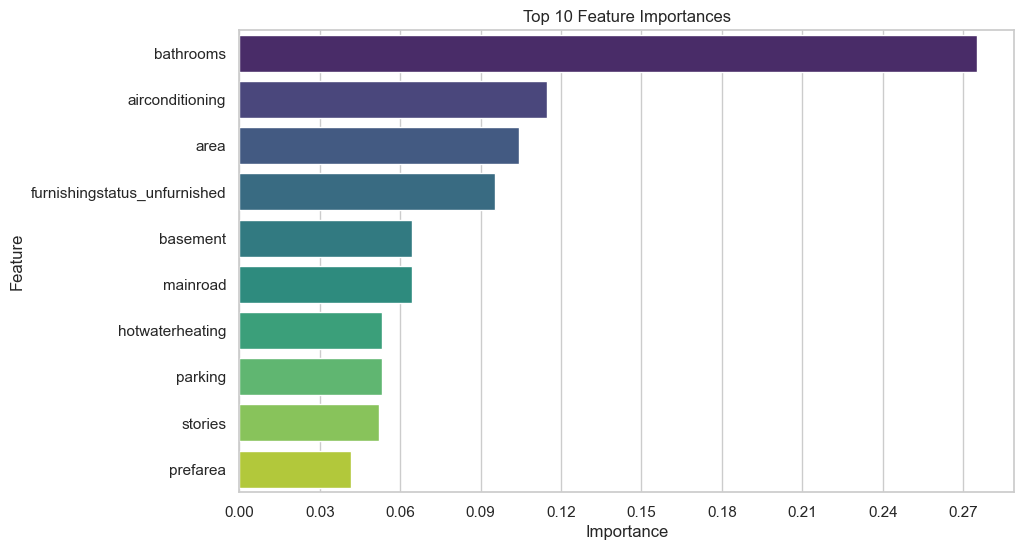

In [184]:
plot_feature_importance(XGBoost_model, x_train, selected_columns, top_n='first')

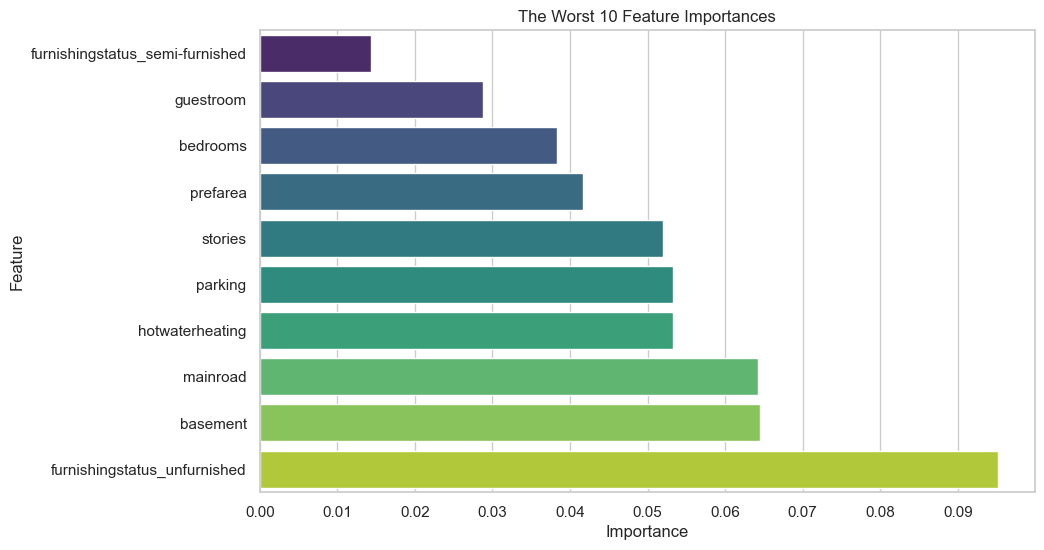

In [185]:
plot_feature_importance(XGBoost_model, x_train, selected_columns, top_n='last')

### Random Search

In [186]:
# best_params, best_score, best_estimator = random_search_regressor('RandomForestClassifier', x_train, y_train, cv=type_cross_valid)

# print('best_params =',best_params)
# print('best_params =',best_score)

In [187]:
# model = best_estimator
# model

### Train Without Search Classification

In [188]:
# model = get_regressor('random_forest_regressor', x_train, y_train, n_estimators=100, max_depth=5, plot=True)
# model

#### Examples

In [189]:
# # Linear Regression
# linear_regression_model = get_regressor('linear_regression', x_train, y_train)

# # Ridge Regression
# ridge_regression_model = get_regressor('ridge_regression', x_train, y_train, alpha=1.0)

# # Lasso Regression
# lasso_regression_model = get_regressor('lasso_regression', x_train, y_train, alpha=1.0)

# # K-Neighbors Regressor
# kneighbors_regressor_model = get_regressor('kneighbors_regressor', x_train, y_train, n_neighbors=5, algorithm='auto')

# # Support Vector Regressor
# svr_model = get_regressor('svr', x_train, y_train, kernel='rbf', C=1.0)

# # Decision Tree Regressor
# decision_tree_regressor_model = get_regressor('decision_tree_regressor', x_train, y_train, criterion='mse', max_depth=None)

# # Random Forest Regressor
# random_forest_regressor_model = get_regressor('random_forest_regressor', x_train, y_train, n_estimators=100, max_depth=None)

# # Bagging Regressor
# bagging_regressor_model = get_regressor('bagging_regressor', x_train, y_train, n_estimators=10, base_estimator=None)

# # AdaBoost Regressor
# adaboost_regressor_model = get_regressor('adaboost_regressor', x_train, y_train, n_estimators=50, learning_rate=1.0)

# # Gradient Boosting Regressor
# gradient_boosting_regressor_model = get_regressor('gradient_boosting_regressor', x_train, y_train, n_estimators=100, learning_rate=0.1)

# # XGBoost Regressor
# xgboost_regressor_model = get_regressor('xgboost_regressor', x_train, y_train, n_estimators=100, learning_rate=0.1)

# # Stacking Regressor
# stacking_regressor_model = get_regressor('stacking_regressor', x_train, y_train, estimators=[
#     ('lr', LinearRegression()),
#     ('rf', RandomForestRegressor(n_estimators=10))
# ], final_estimator=LinearRegression())


### Check Overfitting

Mean Absolute Error (MAE):
Training MAE: 488258.7859
Validation MAE: 677534.3491

Mean Squared Error (MSE):
Training MSE: 439023150823.5790
Validation MSE: 781858540460.5189

Root Mean Squared Error (RMSE):
Training RMSE: 662588.2212
Validation RMSE: 884227.6519

R² Score:
Training R²: 0.8638
Validation R²: 0.6200

Cross-Validation (CV):
Cross-Validation Scores: [1.75450079e+12 1.39796942e+12 7.84943763e+11 9.74641601e+11
 1.26472326e+12]
Cross-Validation Mean Score: 1235355764973.1694


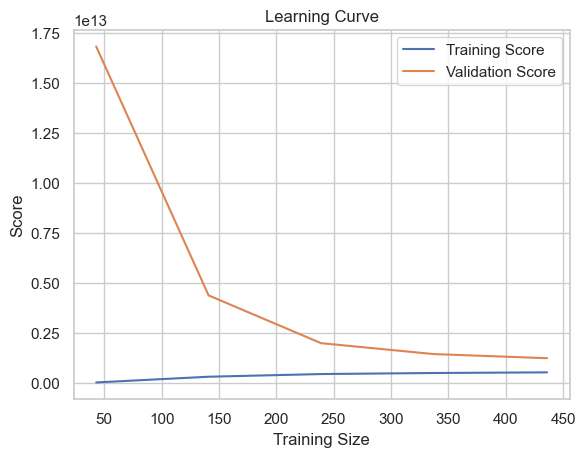

In [190]:
Check_Overfitting_Regression(XGBoost_model,x,y,x_train,y_train,x_valid,y_valid)

In [191]:
have_overfitting[0] = 1 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [192]:
y_pred = XGBoost_model.predict(x_test)

### Evaluate model

#### accuracy,recall,precision,f1 and roc_auc

Mean Absolute Error (MAE) = 964877.1766
Mean Squared Error (MSE) = 1750820572711.6704
Root Mean Squared Error (RMSE) = 1323185.7665
R² Score = 0.6536


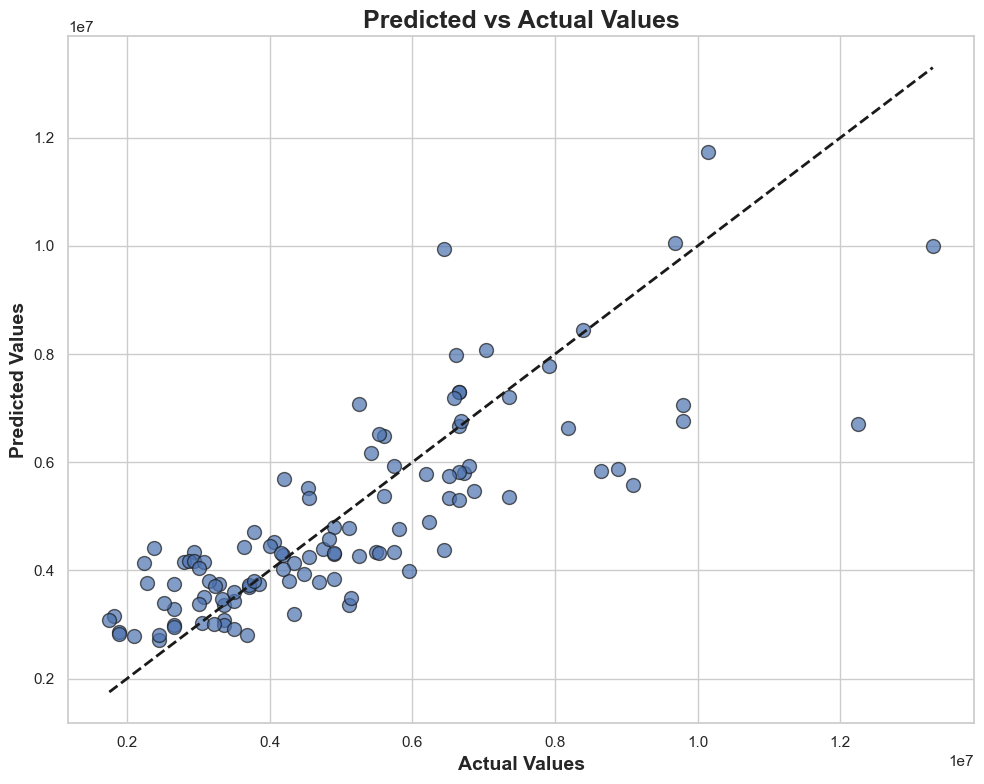

In [193]:
mae , mse, rmse, r2 = evaluate_model_regression(y_test, y_pred)
models_values[0] = [mae , mse, rmse, r2]

## RandomForest_model

In [194]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [195]:
best_params, best_score, best_estimator = grid_search_regressor('RandomForest', x_train, y_train, cv=type_cross_valid, scoring='neg_mean_squared_error')

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'max_depth': 20, 'n_estimators': 200}
best_params = -1207565413642.689


In [196]:
RandomForest_model = best_estimator
RandomForest_model

RandomForestRegressor(max_depth=20, n_estimators=200)

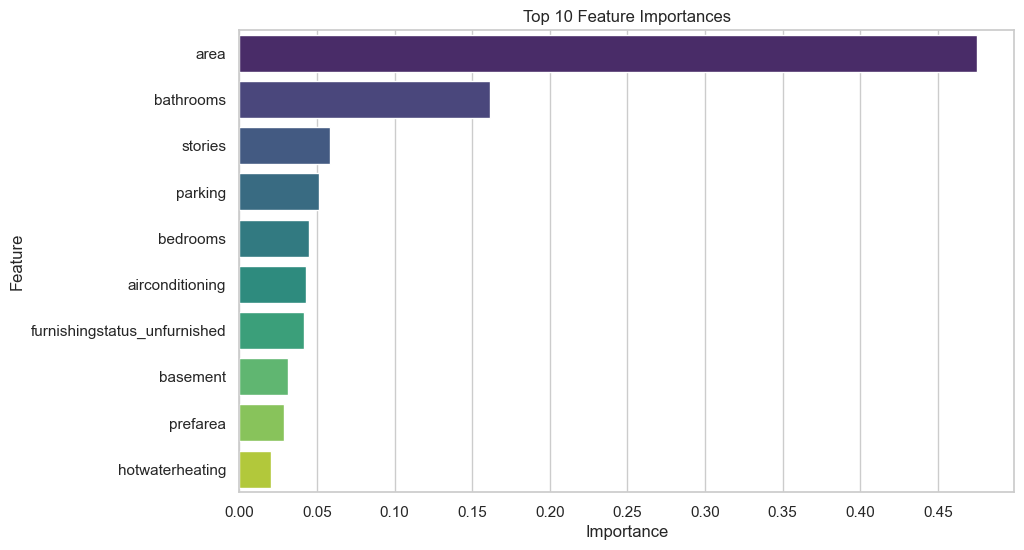

In [197]:
plot_feature_importance(RandomForest_model, x_train, selected_columns, top_n='first')

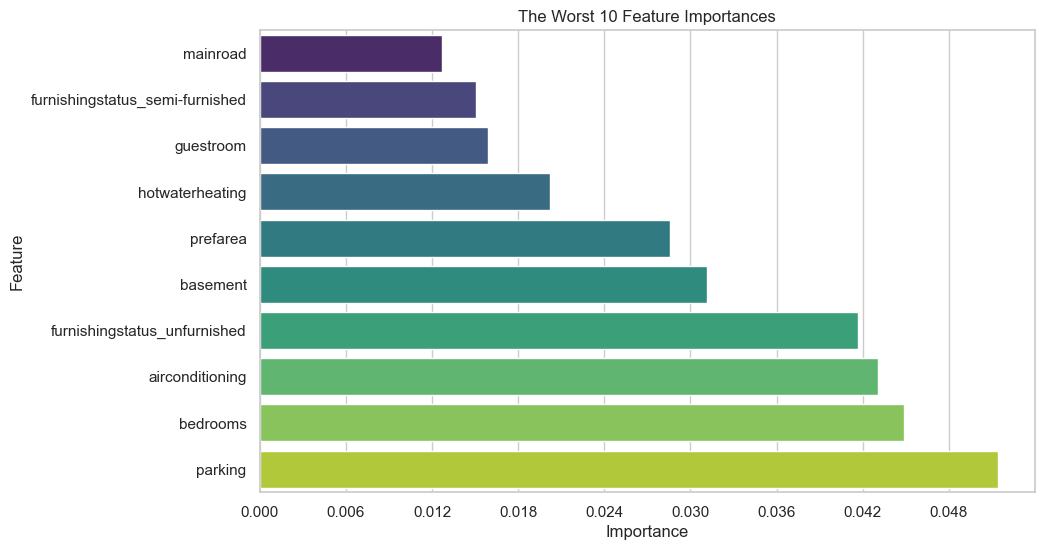

In [198]:
plot_feature_importance(RandomForest_model, x_train, selected_columns, top_n='last')

### Check Overfitting

Mean Absolute Error (MAE):
Training MAE: 280617.0925
Validation MAE: 683489.1648

Mean Squared Error (MSE):
Training MSE: 164961158913.5889
Validation MSE: 821847259746.2253

Root Mean Squared Error (RMSE):
Training RMSE: 406154.1073
Validation RMSE: 906557.9186

R² Score:
Training R²: 0.9488
Validation R²: 0.6006

Cross-Validation (CV):
Cross-Validation Scores: [1.95025030e+12 1.33370300e+12 7.39096108e+11 9.94528420e+11
 1.33423106e+12]
Cross-Validation Mean Score: 1270361777719.4978


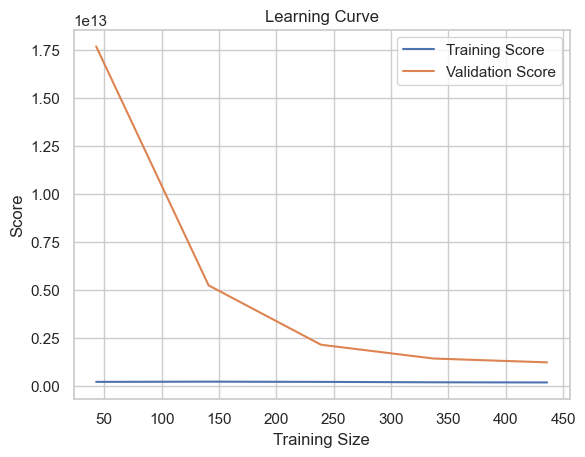

In [199]:
Check_Overfitting_Regression(RandomForest_model,x,y,x_train,y_train,x_valid,y_valid)

In [200]:
have_overfitting[1] = -1 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [201]:
y_pred = RandomForest_model.predict(x_test)

### Evaluate model

#### accuracy,recall,precision,f1 and roc_auc

Mean Absolute Error (MAE) = 1021377.9365
Mean Squared Error (MSE) = 1983613808584.4392
Root Mean Squared Error (RMSE) = 1408408.2535
R² Score = 0.6076


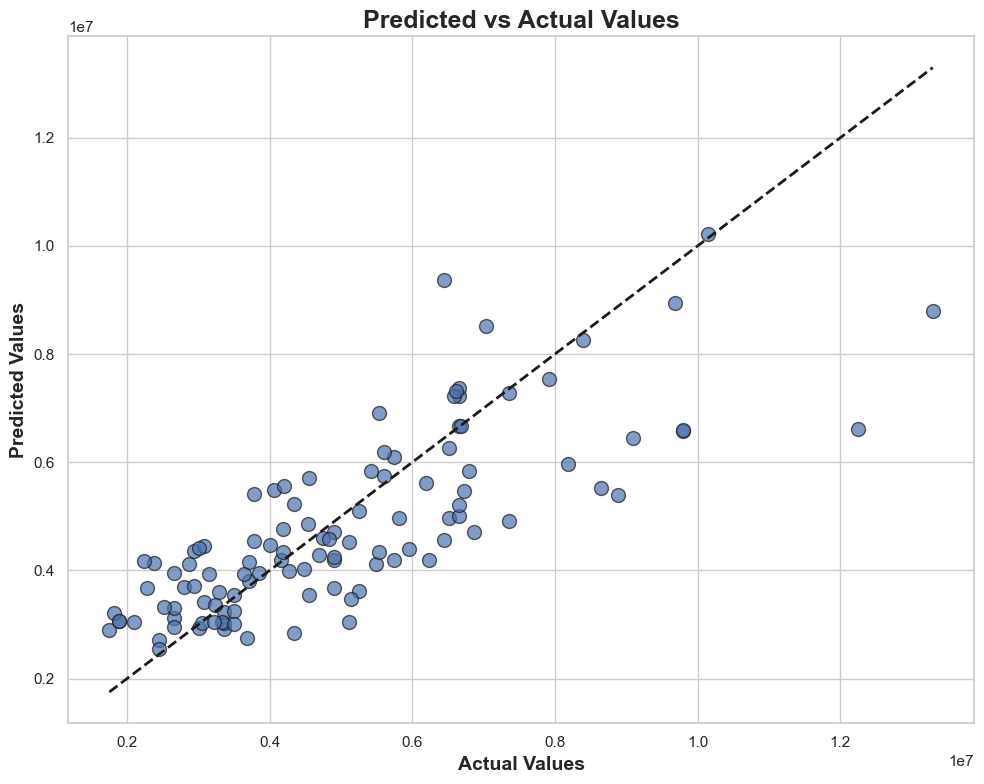

In [202]:
mae , mse, rmse, r2 = evaluate_model_regression(y_test, y_pred)
models_values[1] = [mae , mse, rmse, r2]

## DecisionTree_model

In [203]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [204]:
best_params, best_score, best_estimator = grid_search_regressor('DecisionTree', x_train, y_train, cv=type_cross_valid, scoring='neg_mean_squared_error', perfect_params=True)

print('best_params =',best_params)
print('best_params =',best_score)

best_params = {'criterion': 'friedman_mse', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
best_params = -1445282388127.63


In [205]:
DT_model = best_estimator
DT_model

DecisionTreeRegressor(criterion='friedman_mse', max_depth=20,
                      min_samples_leaf=4, min_samples_split=10,
                      splitter='random')

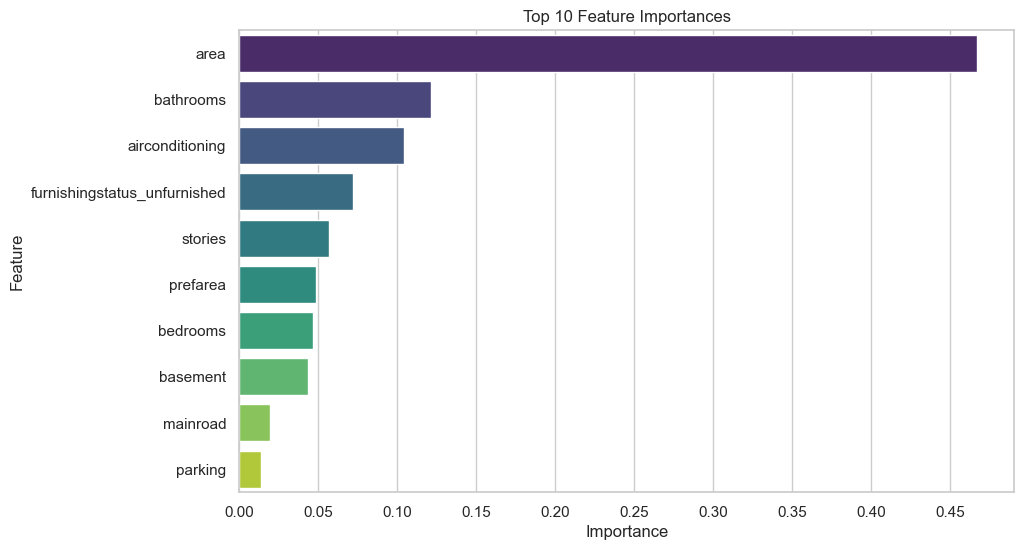

In [206]:
plot_feature_importance(DT_model, x_train, selected_columns, top_n='first')

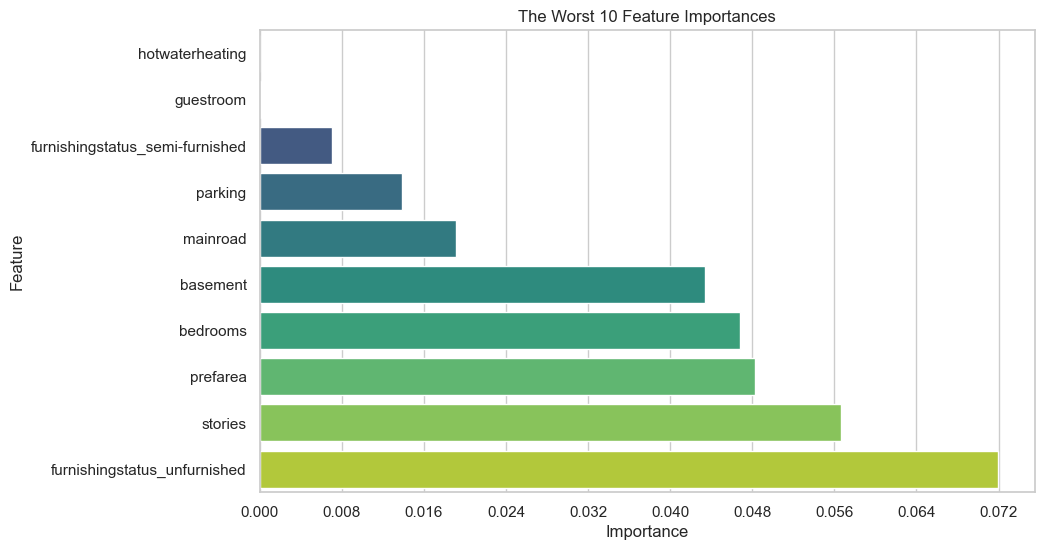

In [207]:
plot_feature_importance(DT_model, x_train, selected_columns, top_n='last')

### Check Overfitting

Mean Absolute Error (MAE):
Training MAE: 635275.7178
Validation MAE: 832041.1426

Mean Squared Error (MSE):
Training MSE: 796607974351.5388
Validation MSE: 1255333671736.9846

Root Mean Squared Error (RMSE):
Training RMSE: 892528.9768
Validation RMSE: 1120416.7402

R² Score:
Training R²: 0.7528
Validation R²: 0.3899

Cross-Validation (CV):
Cross-Validation Scores: [2.55742424e+12 1.54148846e+12 1.28677825e+12 1.23249956e+12
 1.75039932e+12]
Cross-Validation Mean Score: 1673717966708.7378


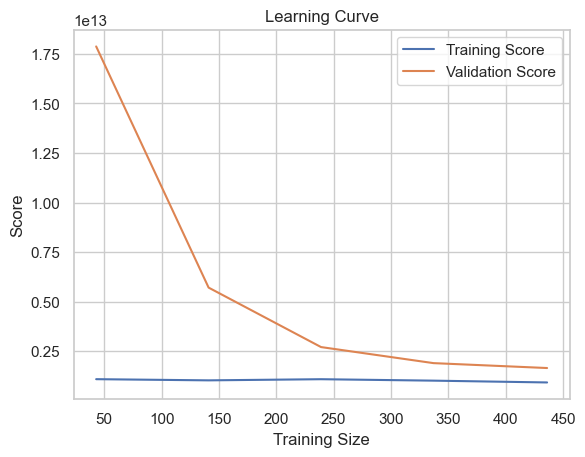

In [208]:
Check_Overfitting_Regression(DT_model,x,y,x_train,y_train,x_valid,y_valid)

In [209]:
have_overfitting[2] = -1 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [210]:
y_pred = DT_model.predict(x_test)

### Evaluate model

#### accuracy,recall,precision,f1 and roc_auc

Mean Absolute Error (MAE) = 1164812.8635
Mean Squared Error (MSE) = 2721836534548.3198
Root Mean Squared Error (RMSE) = 1649798.9376
R² Score = 0.4615


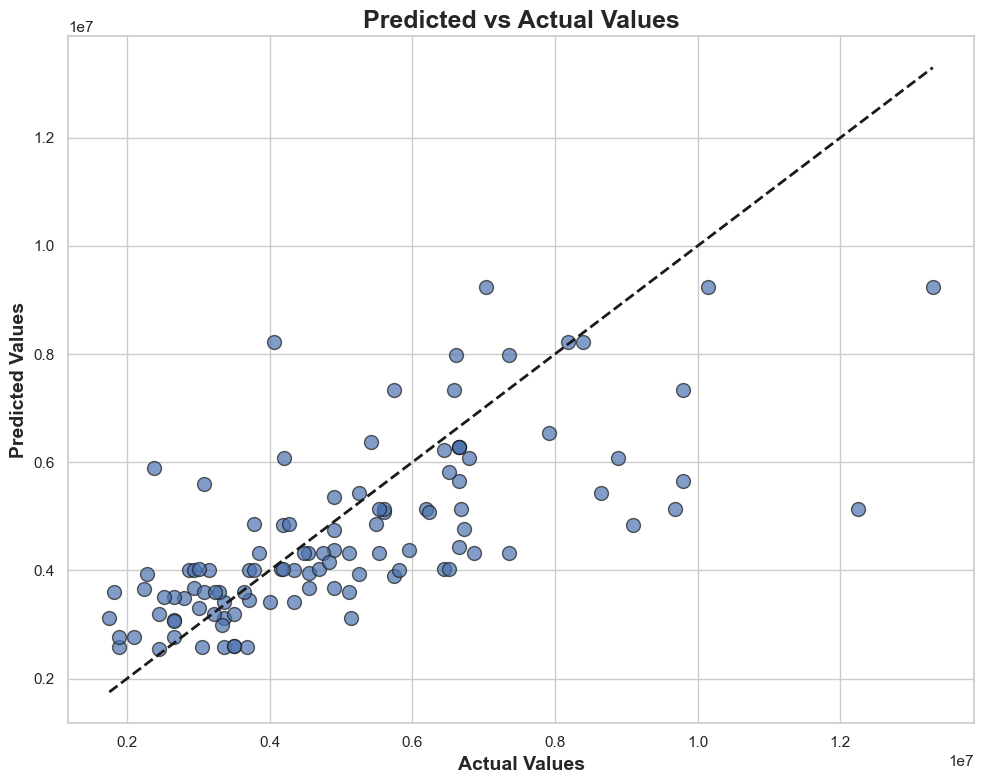

In [211]:
mae , mse, rmse, r2 = evaluate_model_regression(y_test, y_pred)
models_values[2] = [mae , mse, rmse, r2]

## Stacking_model

In [212]:
type_cross_valid = get_cross_validator(cv_type='StratifiedKFold', cv=5)

In [213]:
# Define individual classifiers

xgboost = XGBRegressor(gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300)
xgboost_2 = XGBRegressor(gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300)
xgboost_3 = XGBRegressor(gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=1, n_estimators=300)

random_forest = RandomForestRegressor(bootstrap=False, criterion='entropy', max_depth=29,
                                    max_features='log2', min_samples_leaf=5,
                                    min_samples_split=5, n_estimators=196)
svc = DecisionTreeRegressor()

# Define final estimator
final_estimator = Lasso()

In [214]:
# Define stacking classifier with individual estimators
stacking_model = StackingRegressor(
    estimators=[('xgb', xgboost), ('xgb_2', xgboost_2), ('xgb_3', xgboost_3)],
    final_estimator = Lasso(),
    cv=type_cross_valid
)

# Fit the stacking model
stacking_model.fit(x_train, y_train)

StackingRegressor(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                  estimators=[('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=0,
                                            grow_policy=None,
                                            impo...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None, min_child_weight=1,
                                            missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=Lasso())

### Check Overfitting

Mean Absolute Error (MAE):
Training MAE: 298986.4001
Validation MAE: 727821.5542

Mean Squared Error (MSE):
Training MSE: 151331652223.9554
Validation MSE: 889235044811.4225

Root Mean Squared Error (RMSE):
Training RMSE: 389013.6916
Validation RMSE: 942992.6006

R² Score:
Training R²: 0.9530
Validation R²: 0.5678

Cross-Validation (CV):
Cross-Validation Scores: [1.84083342e+12 1.69550659e+12 8.80684642e+11 9.87710160e+11
 1.50240422e+12]
Cross-Validation Mean Score: 1381427806864.9631


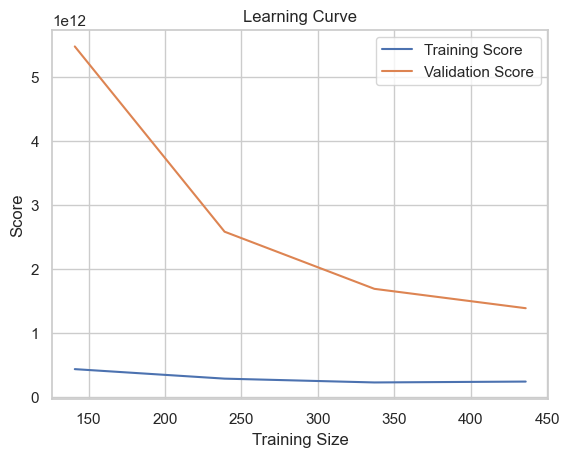

In [215]:
Check_Overfitting_Regression(stacking_model,x,y,x_train,y_train,x_valid,y_valid)

In [216]:
have_overfitting[3] = 0 # if have overfitting add -1 if have small overfitting between(1% and 4%) add 0 if no overfitting add 1

### Get y_predict

In [217]:
y_pred = stacking_model.predict(x_test)

### Evaluate model

#### accuracy,recall,precision,f1 and roc_auc

Mean Absolute Error (MAE) = 995338.5161
Mean Squared Error (MSE) = 1930997811945.1382
Root Mean Squared Error (RMSE) = 1389603.4729
R² Score = 0.6180


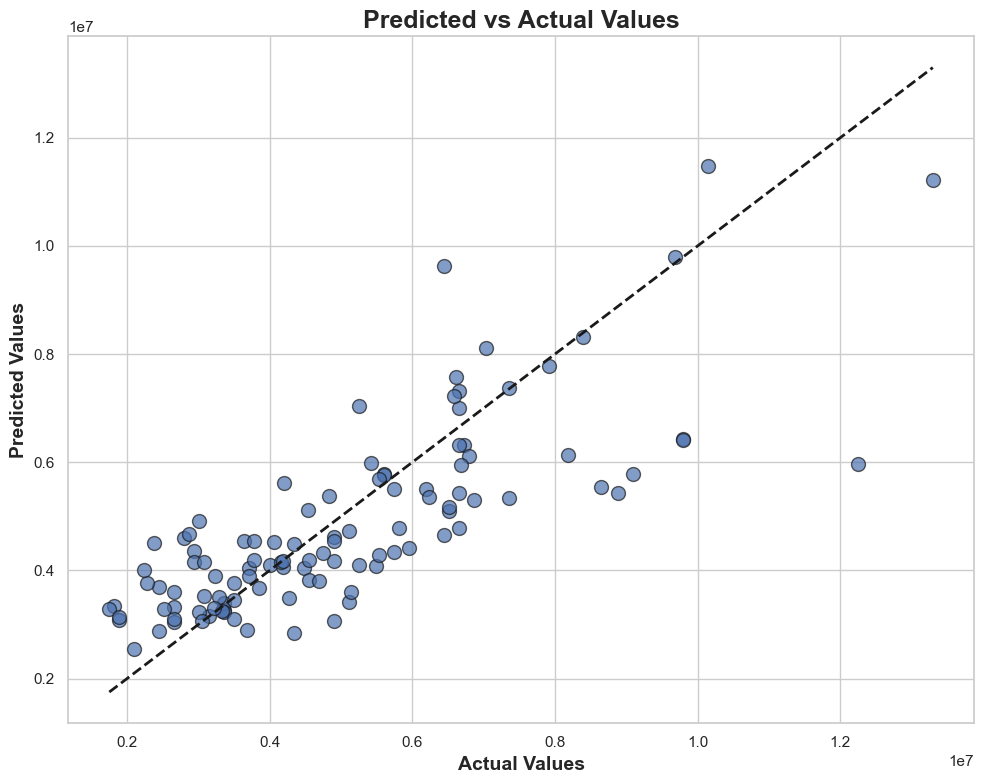

In [218]:
mae , mse, rmse, r2 = evaluate_model_regression(y_test, y_pred)
models_values[3] = [mae , mse, rmse, r2]

# compare between the models

In [219]:
evaluate_names = ['MAE' , 'MSE', 'RMSE', 'R2']
models_names = ['XGBoost', 'RandomForest', 'DecisionTre', 'Stacking']


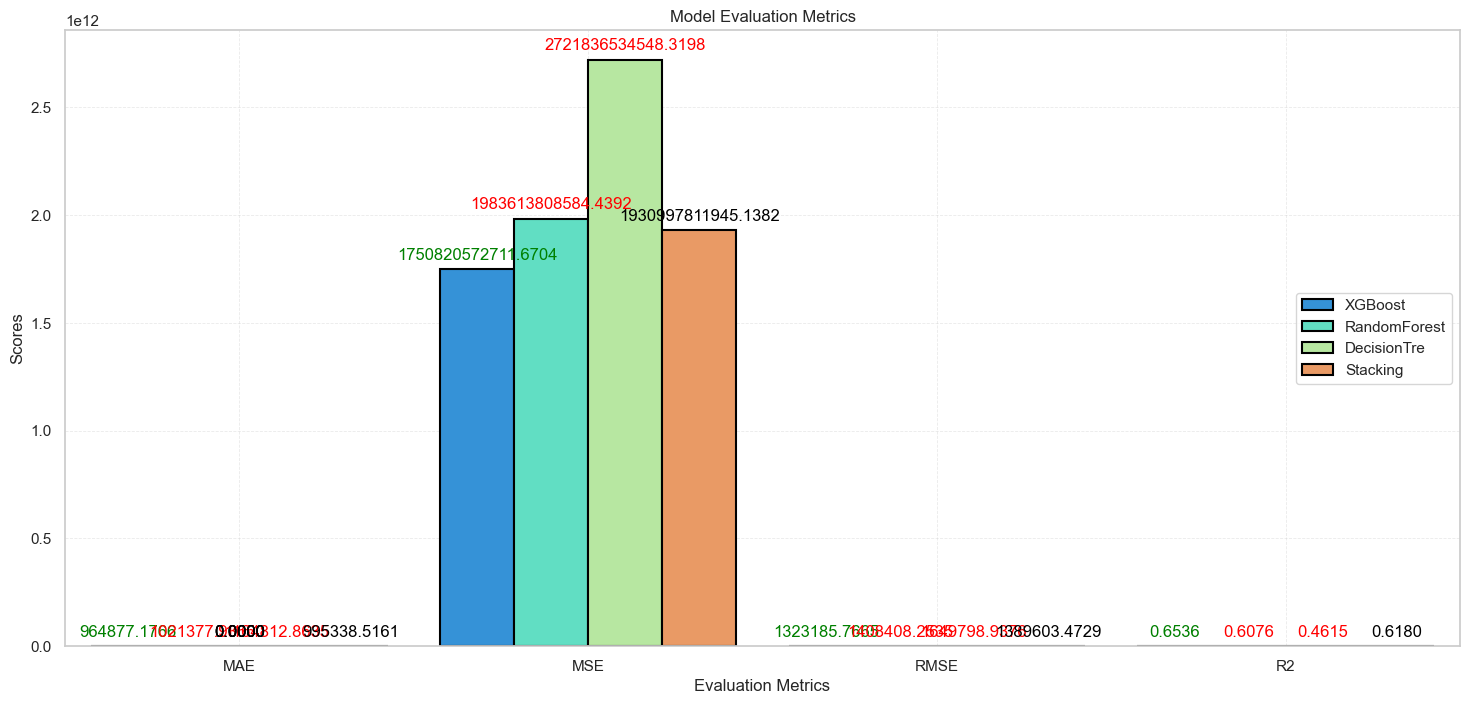

In [220]:
plots_evaluate_models(
    data=models_values, 
    labels=models_names, 
    categories=evaluate_names,
    have_overfitting=have_overfitting,
    palette='rainbow',
    title='Model Evaluation Metrics',
    xlabel='Evaluation Metrics',
    ylabel='Scores',
    figsize=(18, 8),
    width=0.85,
    hatch = False,
    annote_num = 4
)